<h1 style="text-align: center;">Testing MC Notebook</h1>
<h3 style="text-align: center;">Diego Ontiveros</h3>

<center>In this notebook different aspects of the Monte Carlo program will be tested separatedly to secure all works well and is as optimized as possible.</center>

In [5]:
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [6]:
def fnHeLi(R,n,b):
    suma = np.sum([(b*R)**k /np.math.factorial(k) for k in range(n+1)],axis=0)
    # k = np.arange(n+1)
    # suma = np.sum( (b*R)**k/sp.special.factorial(k) ) # broadcastin!
    return 1 - np.exp(-b*R) * suma
    
def HeLiPotential(R):

    # Faster power calculations
    R2 = R*R
    R4 = R2*R2
    R6 = R4*R2
    R7 = R6*R
    R8 = R4*R4

    # Parametrized coefitients
    A,b = 20.8682, 2.554
    D4 = 1.383192/2
    D6 = 2.4451/2 + 0.298
    D7 = 7.3267/2
    D8 = 10.6204/2 + 43.104/24 + 1.98
    
    V4 = fnHeLi(R,4,b)*D4/R4
    V6 = fnHeLi(R,6,b)*D6/R6
    V7 = fnHeLi(R,7,b)*D7/R7
    V8 = fnHeLi(R,8,b)*D8/R8

    return A*np.exp(-b*R) - V4 - V6 - V7 - V8

In [7]:
def fnHeHe(x,D):
    return np.exp(-(D/x-1)**2)


def HeHePotential(R):
    eps = 10.97
    rm = 2.9695/0.529177
    x = R/rm

    # Faster power calculations
    x2 = x*x
    x6 = x2*x2*x2
    x8 = x6*x2
    x10 = x8*x2
    x12 = x10*x2

    # Parametrized coefitients
    A = 1.89635353e5
    a,b = 10.70203539, -1.90740649
    D6,D8,D10 = 1.4651625, 1.2, 1.1
    c6, c8, c10 = 1.34687065, 0.41308398, 0.17060159

    f6 = fnHeHe(x,D6)
    f8 = fnHeHe(x,D8)
    f10 = fnHeHe(x,D10)

    Vx = A*np.exp(-a*x+b*x**2) - f6*c6/x6 -f8*c8/x8 - f10*c10/x10 

    return eps*Vx


5.578578578578579
-631.160741292113


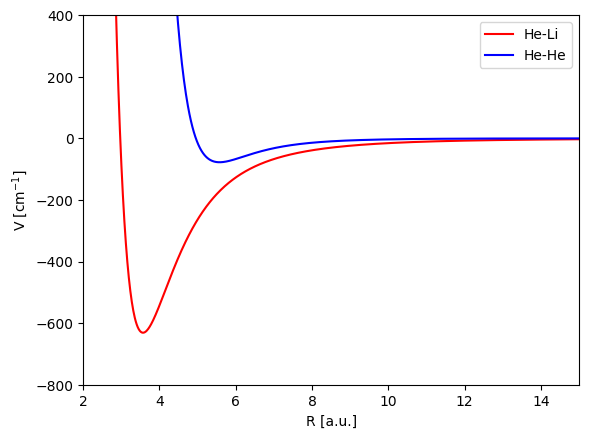

In [9]:
R = np.linspace(2,15,1000)
VHeHe = HeHePotential(R)*219474.63/315777*10        # muliplied by 10 for better visualization
VHeLi = HeLiPotential(R)*219474.63
plt.plot(R,VHeLi,c="r",label="He-Li")
plt.plot(R,VHeHe,c="b",label="He-He")
plt.xlim(R[0],R[-1])
print(R[np.argmin(VHeHe)])
plt.ylim(-800,400)
plt.xlabel("R [a.u.]");plt.ylabel("V [cm$^{-1}$]")
plt.legend()


Testing visualization of coordinates

In [164]:
def draw(coord,ax:plt.Axes):
    ax.scatter(*coord, s=100, c="r", alpha=True)

Text(0.5, 0, 'z')

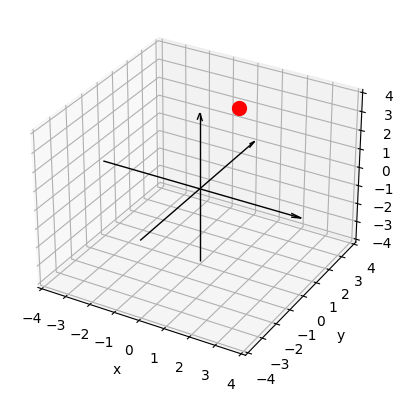

In [167]:
coord = np.array([1,1,4])

# Testing Visualization
fig = plt.figure()
ax = plt.axes(projection="3d")
draw(coord,ax)


lim = 4 #box limit
ax.quiver(-lim, 0, 0, 2*lim, 0, 0, color='k',lw=1, arrow_length_ratio=0.05)     # x-axis
ax.quiver(0, -lim, 0, 0, 2*lim, 0, color='k',lw=1, arrow_length_ratio=0.05)     # y-axis
ax.quiver(0, 0, -lim, 0, 0, 2*lim, color='k',lw=1, arrow_length_ratio=0.05)     # z-axis
ax.set_xlim(-lim,lim);ax.set_ylim(-lim,lim);ax.set_zlim(-lim,lim)               # Box limits
ax.set_xlabel("x");ax.set_ylabel("y");ax.set_zlabel("z")                        # Axis Labels